# Statistik Praktikum

In [48]:
# --- Setup & Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

2+2

#### Hilfe holen in Python / Pandas / Seaborn

## Direkte Hilfe in Python / Jupyter
help(pd.DataFrame.describe)     # zeigt offizielle Doku im Notebook

In [2]:
# Hilfe holen in Python / Pandas / Seaborn

# Direkte Hilfe in Python / Jupyter
help(pd.DataFrame.describe)     # zeigt offizielle Doku im Notebook

Help on function describe in module pandas.core.generic:

describe(self, percentiles=None, include=None, exclude=None) -> 'Self'
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Series``. Here are the 

In [3]:
help(pd.DataFrame)  

Help on class DataFrame in module pandas.core.frame:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None) -> 'None'
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order. If a dict contains Series
 |      which have an index defined, it is aligned by its index. This alignment also
 |      occurs if data i

In [4]:
# 2️⃣ Beispiele ansehen
# Fast jedes Objekt hat eine "docstring"-Beschreibung:
print(sns.barplot.__doc__[:500])  # Anfang der Doku anzeigen

Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the variables


In [5]:
print(pd.read_csv.__doc__[:500])  # Anfang der Doku anzeigen


Read a comma-separated values (csv) file into DataFrame.

Also supports optionally iterating or breaking of the file
into chunks.

Additional help can be found in the online docs for
`IO Tools <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.

Parameters
----------
filepath_or_buffer : str, path object or file-like object
    Any valid string path is acceptable. The string could be a URL. Valid
    URL schemes include http, ftp, s3, gs, and file. For file URLs, a host is
    


In [6]:
# Cheatsheets & offizielle Doku
# https://pandas.pydata.org/docs/
# https://docs.python.org/3/
# https://seaborn.pydata.org/
# https://matplotlib.org/stable/gallery/index.html

In [7]:
# Optionale Anzeigeoptionen
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [8]:
# --- Titanic-Datensatz laden ---
df = sns.load_dataset("titanic")

In [9]:
# Überblick
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Strukturinformationen
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
help(df.info)

Help on method info in module pandas.core.frame:

info(verbose: 'bool | None' = None, buf: 'WriteBuffer[str] | None' = None, max_cols: 'int | None' = None, memory_usage: 'bool | str | None' = None, show_counts: 'bool | None' = None) -> 'None' method of pandas.core.frame.DataFrame instance
    Print a concise summary of a DataFrame.
    
    This method prints information about a DataFrame including
    the index dtype and columns, non-null values and memory usage.
    
    Parameters
    ----------
    verbose : bool, optional
        Whether to print the full summary. By default, the setting in
        ``pandas.options.display.max_info_columns`` is followed.
    buf : writable buffer, defaults to sys.stdout
        Where to send the output. By default, the output is printed to
        sys.stdout. Pass a writable buffer if you need to further process
        the output.
    max_cols : int, optional
        When to switch from the verbose to the truncated output. If the
        DataFram

In [12]:
# Beschreibung numerischer Spalten
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Kategoriale Merkmale
df.describe(include="object")

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [14]:
# Beispielhafte Auswahl und Filterung
df.loc[df["age"] > 60, ["sex", "age", "class", "survived"]].head(10)

,sex,age,class,survived
33,male,66.0,Second,0
54,male,65.0,First,0
96,male,71.0,First,0
116,male,70.5,Third,0
170,male,61.0,First,0
252,male,62.0,First,0
275,female,63.0,First,1
280,male,65.0,Third,0
326,male,61.0,Third,0
438,male,64.0,First,0


In [15]:
# Query-Variante
df.query("age > 60 and sex == 'female'")[["age", "sex", "class", "survived"]]

,age,sex,class,survived
275,63.0,female,First,1
483,63.0,female,Third,1
829,62.0,female,First,1


In [16]:
# Sortieren nach Klasse und Alter
df.sort_values(["class", "age"]).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,C,Southampton,no,False
445,1,1,male,4.00,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
802,1,1,male,11.00,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
435,1,1,female,14.00,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
689,1,1,female,15.00,0,1,211.3375,S,First,child,False,B,Southampton,yes,False
329,1,1,female,16.00,0,1,57.9792,C,First,woman,False,B,Cherbourg,yes,False
504,1,1,female,16.00,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
853,1,1,female,16.00,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
307,1,1,female,17.00,1,0,108.9000,C,First,woman,False,C,Cherbourg,yes,False


In [17]:
# Fehlende Werte prüfen
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
# Anteil fehlender Werte in %
(df.isna().mean() * 100).round(1)

survived        0.0
pclass          0.0
sex             0.0
age            19.9
sibsp           0.0
parch           0.0
fare            0.0
embarked        0.2
class           0.0
who             0.0
adult_male      0.0
deck           77.2
embark_town     0.2
alive           0.0
alone           0.0
dtype: float64

In [19]:
# Fehlende Alterswerte durch Median ersetzen
df["age_filled"] = df["age"].fillna(df["age"].median())

In [20]:
# Duplikate prüfen
df.duplicated().sum()

107

In [21]:
help(pd.DataFrame.duplicated)

Help on function duplicated in module pandas.core.frame:

duplicated(self, subset: 'Hashable | Sequence[Hashable] | None' = None, keep: 'DropKeep' = 'first') -> 'Series'
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equivalent method on index.
    Series.duplicated : Equiv

In [22]:
# Einzelne Kennzahlen
mean_age = df["age"].mean()
median_age = df["age"].median()
std_age = df["age"].std()

In [23]:
print(f"Mittelwert: {mean_age:.1f}, Median: {median_age:.1f}, Std: {std_age:.1f}")

Mittelwert: 29.7, Median: 28.0, Std: 14.5


In [24]:
# Quartile & IQR
q = df["age"].quantile([0.25, 0.5, 0.75])
iqr = q[0.75] - q[0.25]

In [25]:
q, iqr

(0.25    20.125
 0.50    28.000
 0.75    38.000
 Name: age, dtype: float64,
 17.875)

In [26]:
# Alterskennzahlen nach Klasse
df.groupby("class")["age"].agg(["count","mean","median","std","min","max"])

c:\temp\ipykernel_22404\480584074.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("class")["age"].agg(["count","mean","median","std","min","max"])


,count,mean,median,std,min,max
class,,,,,,
First,186,38.233441,37.0,14.802856,0.92,80.0
Second,173,29.877630,29.0,14.001077,0.67,70.0
Third,355,25.140620,24.0,12.495398,0.42,74.0


In [27]:
# Überlebensraten nach Geschlecht
pd.crosstab(df["sex"], df["survived"], normalize="index").round(2)

survived,0,1
sex,,
female,0.26,0.74
male,0.81,0.19


In [28]:
# Durchschnittsalter nach Geschlecht und Klasse
df.groupby(["sex","class"])["age"].mean().round(1)

c:\temp\ipykernel_22404\753521153.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sex","class"])["age"].mean().round(1)


sex     class 
female  First     34.6
        Second    28.7
        Third     21.8
male    First     41.3
        Second    30.7
        Third     26.5
Name: age, dtype: float64

In [29]:
df.groupby("class", observed=True)["age"].agg(["count","mean","median","std","min","max"])

,count,mean,median,std,min,max
class,,,,,,
First,186,38.233441,37.0,14.802856,0.92,80.0
Second,173,29.877630,29.0,14.001077,0.67,70.0
Third,355,25.140620,24.0,12.495398,0.42,74.0


In [30]:
df.groupby(["sex","class"], observed=True)["age"].mean().round(1)

sex     class 
female  First     34.6
        Second    28.7
        Third     21.8
male    First     41.3
        Second    30.7
        Third     26.5
Name: age, dtype: float64

In [31]:
# Häufigkeiten
df["class"].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

In [32]:
# Prozentuale Häufigkeiten
df["class"].value_counts(normalize=True).mul(100).round(1)

class
Third     55.1
First     24.2
Second    20.7
Name: proportion, dtype: float64

In [33]:
# Kreuztabelle
pd.crosstab(index=df["class"], columns=df["sex"], normalize="index", margins=True).round(2)

sex,female,male
class,,
First,0.44,0.56
Second,0.41,0.59
Third,0.29,0.71
All,0.35,0.65


In [34]:
# Gleichbreite Klassen
df["fare_bin"] = pd.cut(df["fare"], bins=[0,50,100,200,600], labels=["0-50","50-100","100-200","200-600"])
df[["fare","fare_bin"]].head(10)

,fare,fare_bin
0,7.2500,0-50
1,71.2833,50-100
2,7.9250,0-50
3,53.1000,50-100
4,8.0500,0-50
5,8.4583,0-50
6,51.8625,50-100
7,21.0750,0-50
8,11.1333,0-50
9,30.0708,0-50


In [35]:
# Ausreißerprüfung mit IQR-Regel
Q1, Q3 = df["fare"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lo, hi = Q1 - 1.5*IQR, Q3 + 1.5*IQR
outliers = df.loc[(df["fare"] < lo) | (df["fare"] > hi), "fare"]
print(f"Anzahl Ausreißer (IQR-Regel): {len(outliers)}")

Anzahl Ausreißer (IQR-Regel): 116


In [36]:
# Z-Score Methode
z = np.abs(stats.zscore(df["fare"].dropna()))
np.sum(z > 3)

20

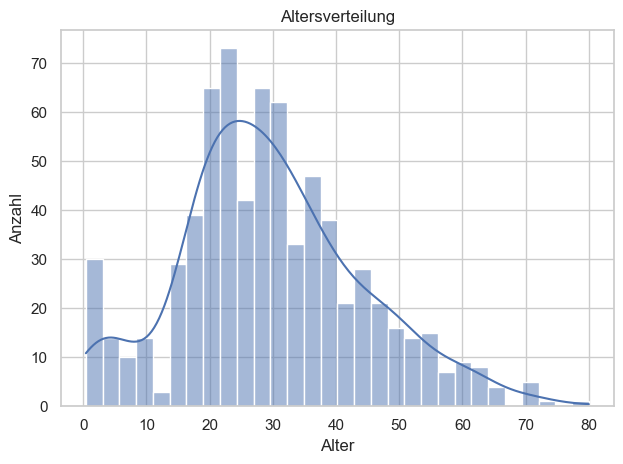

In [37]:
# Histogramm Alter
plt.figure()
sns.histplot(data=df, x="age", bins=30, kde=True)
plt.title("Altersverteilung")
plt.xlabel("Alter")
plt.ylabel("Anzahl")
plt.tight_layout()
plt.savefig("01_hist_age.png", dpi=150)
plt.show()




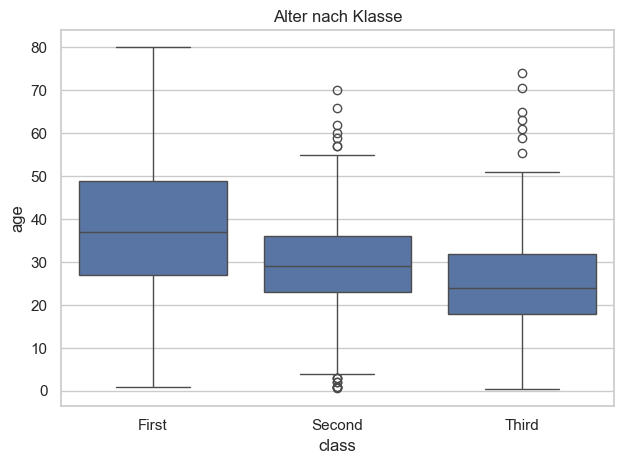

In [38]:
# Boxplot Alter nach Klasse
plt.figure()
sns.boxplot(data=df, x="class", y="age")
plt.title("Alter nach Klasse")
plt.tight_layout()
plt.savefig("02_box_age_class.png", dpi=150)
plt.show()


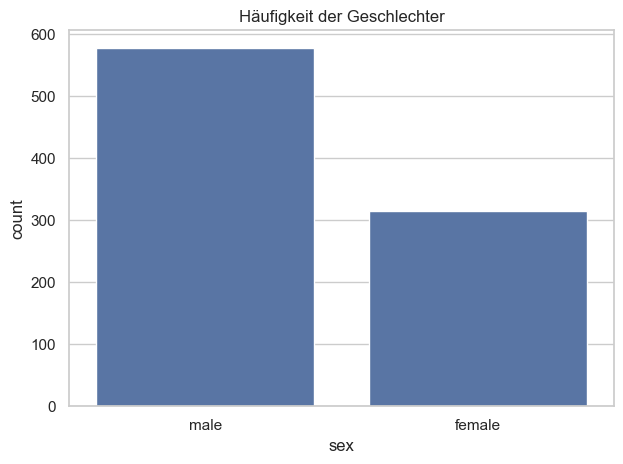

In [39]:
# Countplot Geschlecht
plt.figure()
sns.countplot(data=df, x="sex")
plt.title("Häufigkeit der Geschlechter")
plt.tight_layout()
plt.savefig("03_count_sex.png", dpi=150)
plt.show()


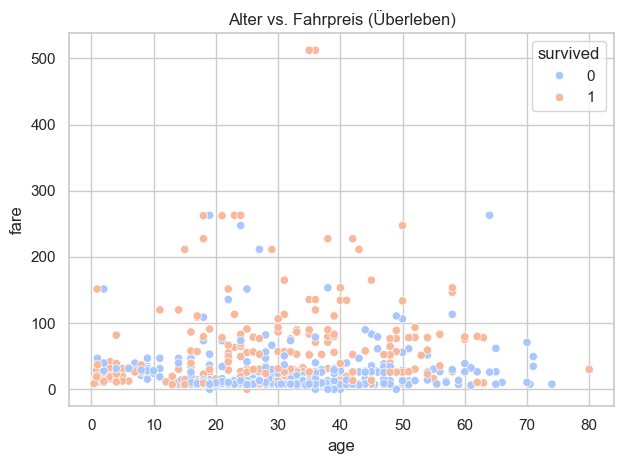

In [40]:
# Scatterplot: Alter vs. Fahrpreis
plt.figure()
sns.scatterplot(data=df, x="age", y="fare", hue="survived", palette="coolwarm")
plt.title("Alter vs. Fahrpreis (Überleben)")
plt.tight_layout()
plt.savefig("04_scatter_age_fare.png", dpi=150)
plt.show()

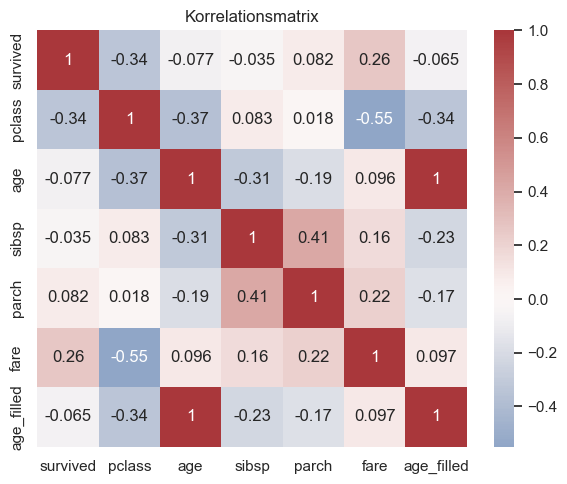

In [41]:
# Korrelationsheatmap
plt.figure(figsize=(6,5))
num = df.select_dtypes(include=[np.number])
sns.heatmap(num.corr(), annot=True, cmap="vlag", center=0)
plt.title("Korrelationsmatrix")
plt.tight_layout()
plt.savefig("05_corr_heatmap.png", dpi=150)
plt.show()

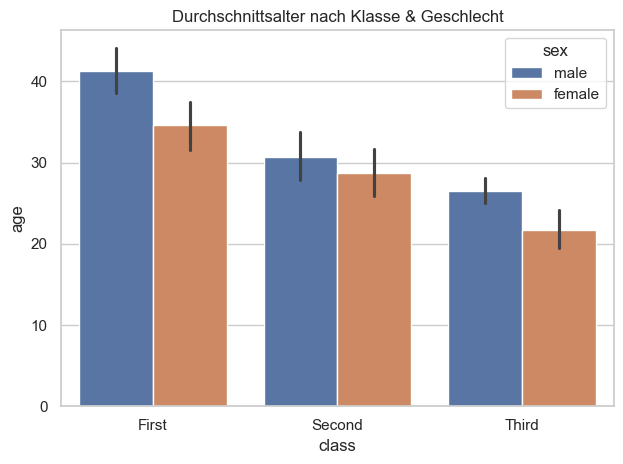

In [42]:
# Mittelwert des Alters nach Klasse und Geschlecht
plt.figure()
sns.barplot(data=df, x="class", y="age", hue="sex", estimator=np.mean)
plt.title("Durchschnittsalter nach Klasse & Geschlecht")
plt.tight_layout()
plt.savefig("06_bar_age_class_sex.png", dpi=150)
plt.show()

c:\temp\ipykernel_22404\1236342402.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="class", y="survived", ci=None)


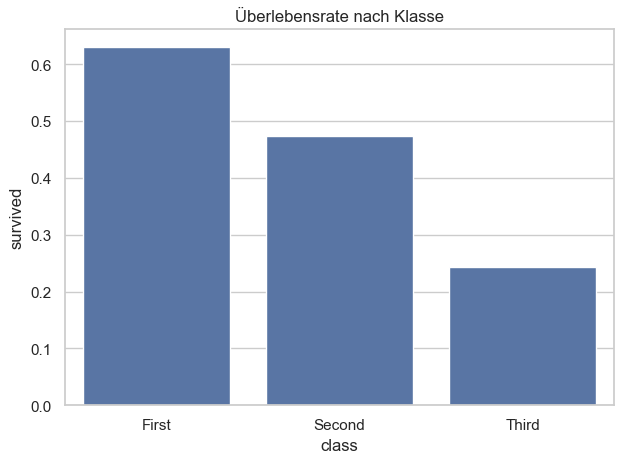

In [43]:
# Überlebensrate nach Klasse
plt.figure()
sns.barplot(data=df, x="class", y="survived", ci=None)
plt.title("Überlebensrate nach Klasse")
plt.tight_layout()
plt.savefig("07_bar_survival_class.png", dpi=150)
plt.show()

<Axes: xlabel='class', ylabel='survived'>

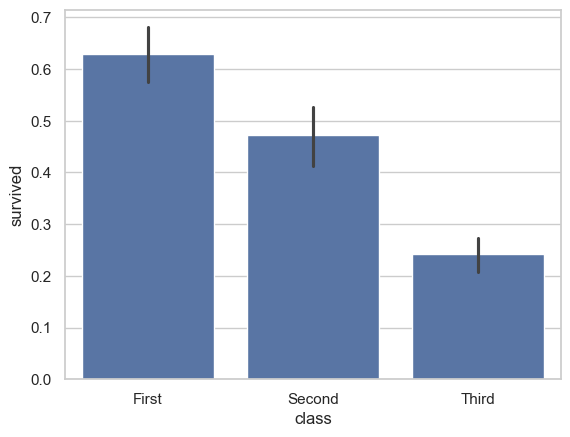

In [44]:
sns.barplot(data=df, x="class", y="survived", errorbar=("ci", 90))

<Axes: xlabel='class', ylabel='survived'>

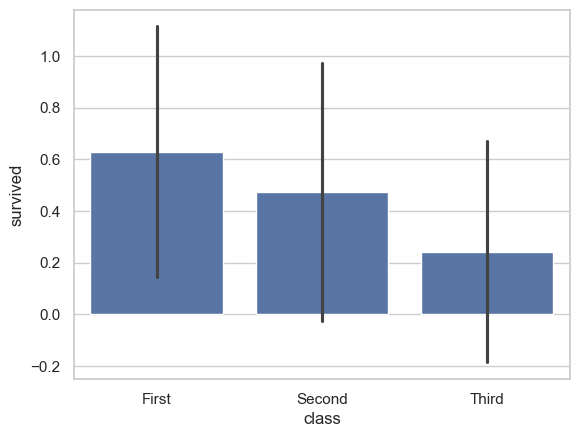

In [45]:
sns.barplot(data=df, x="class", y="survived", errorbar="sd")

In [46]:
# Gruppierte Statistik exportieren
summary = (
    df.groupby("class", observed=True)["age"]
      .agg(["count", "mean", "median", "std"])
      .reset_index()
)
summary.to_csv("summary_age_per_class.csv", index=False)

In [47]:
# Beispiel: Tabelle der Überlebensraten
survival_summary = pd.crosstab(df["sex"], df["survived"], normalize="index").round(2)
survival_summary.to_csv("survival_by_sex.csv")

print("→ Ergebnisse gespeichert.")

→ Ergebnisse gespeichert.
